<h1>Machine Learning for Data Analysis</h1>
<i><h2>Week 2 - Running a Random Forest</h2></i>

The data set I am using is the Gapminder data set. A series of observational variables that have independent sources that have been centralised into one set.

I am investigating the association between incomeperperson and armedforcesrate. The association, or hypothesis, I am expecting is for higher incomeperperson there will be a lower armedforcesrate. So my coefficient to my explanetory variable should be less than 0. I will also be looking at the type of government, the polityscore variable, and seeing if that has a confounding effect.

For the Random Trees Classifier I have kept the same variables and have categorised them to make them compatible with the process.

<h3>SET UP</h3>

<i>Import appropraite packages and set appropriate options</i>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import tree
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
%matplotlib inline

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

<i>Read in the data set</i>

In [3]:
usecols = ['incomeperperson', 'armedforcesrate', 'polityscore', 'country', 'lifeexpectancy', 'alcconsumption']
gap_data = pd.read_csv('gapminder.csv', usecols = usecols, index_col='country')

<i>Replace spaces with blanks and coerce into numeric, replacing the spaces with an empty string is needed for converting to numeric</i>

In [4]:
gap_data.loc[:,'incomeperperson'] = pd.to_numeric(gap_data['incomeperperson'].replace(' ',''))
gap_data.loc[:,'armedforcesrate'] = pd.to_numeric(gap_data['armedforcesrate'].replace(' ',''))
gap_data.loc[:,'polityscore'] = pd.to_numeric(gap_data['polityscore'].replace(' ',''))
gap_data.loc[:,'lifeexpectancy'] = pd.to_numeric(gap_data['lifeexpectancy'].replace(' ',''))
gap_data.loc[:,'alcconsumption'] = pd.to_numeric(gap_data['alcconsumption'].replace(' ',''))

<i>Remove any rows where there are nulls</i>

In [5]:
gap_data.dropna(inplace = True)

<i>Categorise the response variable so that the decision tree is an analyseable size</i>

<b><i>armedforcesrate</i></b>

In [6]:
gap_data['armedforcesrate_cat'] = gap_data.loc[:,'armedforcesrate'].copy()

In [7]:
gap_data.loc[(gap_data['armedforcesrate_cat'] < 1) & (gap_data['armedforcesrate_cat'] >= 0), 'armedforcesrate_cat'] = 0
gap_data.loc[(gap_data['armedforcesrate_cat'] >= 1), 'armedforcesrate_cat'] = 1

In [8]:
gap_data.loc[:,'armedforcesrate_cat'] = gap_data.loc[:,'armedforcesrate_cat'].astype(int).astype(str)

<i>Categorise the explanetory variables to keep the decision tree interpretable</i>

<b><i>incomeperperson</i></b>

In [9]:
gap_data['incomeperperson_cat'] = gap_data.loc[:,'incomeperperson'].copy()

In [10]:
gap_data.loc[(gap_data['incomeperperson_cat'] < 5000) & (gap_data['incomeperperson_cat'] >= 0), 'incomeperperson_cat'] = 1
gap_data.loc[(gap_data['incomeperperson_cat'] >= 5000), 'incomeperperson_cat'] = 2

In [11]:
gap_data.loc[:,'incomeperperson_cat'] = gap_data.loc[:,'incomeperperson_cat'].astype(int)

<b><i>polityscore</i></b>

In [12]:
gap_data['polityscore_cat'] = gap_data.loc[:,'polityscore'].copy()

In [13]:
gap_data.loc[(gap_data['polityscore_cat'] >= 0), 'polityscore_cat'] = 1
gap_data.loc[(gap_data['polityscore_cat'] < 0), 'polityscore_cat'] = 2

In [14]:
gap_data.loc[:,'polityscore_cat'] = gap_data.loc[:,'polityscore_cat'].astype(int)

<i>Look at some information about the data set</i>

In [15]:
gap_data.dtypes

incomeperperson        float64
alcconsumption         float64
armedforcesrate        float64
lifeexpectancy         float64
polityscore            float64
armedforcesrate_cat     object
incomeperperson_cat      int32
polityscore_cat          int32
dtype: object

In [16]:
gap_data.describe()

,incomeperperson,alcconsumption,armedforcesrate,lifeexpectancy,polityscore,incomeperperson_cat,polityscore_cat
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,"6,816.62",6.91,1.38,68.92,3.88,1.36,1.28
std,"9,891.11",5.10,1.54,9.99,6.20,0.48,0.45
min,103.78,0.05,0.00,47.79,-10.00,1.00,1.00
25%,561.71,2.69,0.45,62.09,-2.00,1.00,1.00
50%,"2,231.99",6.12,0.93,72.64,7.00,1.00,1.00
75%,"7,381.31",10.08,1.58,76.13,9.00,2.00,2.00
max,"39,972.35",23.01,9.82,83.39,10.00,2.00,2.00


<h3>Assignment - Calculations</h3>

<i>Split the sample into two sub sets, the training and test sets</i>

In [17]:
predictors = gap_data[['incomeperperson_cat','polityscore_cat']]
targets = gap_data['armedforcesrate_cat']

In [18]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size = 0.4)

<i>This splits the data set into roughly 60% training set, and roughly 40% test set</i>

In [19]:
print('Predictors : training',pred_train.shape, \
      '\nPredictors : testing ',pred_test.shape, \
      '\nTarget     : training',tar_train.shape, \
      '\nTarget     : testing ',tar_test.shape)

Predictors : training (89, 2) 
Predictors : testing  (60, 2) 
Target     : training (89,) 
Target     : testing  (60,)


In [20]:
print("training : ",round((89 / 149) * 100,2), "%", "\ntest     : ",round((60 / 149) * 100,2), "%")

training :  59.73 % 
test     :  40.27 %


<i>We are using Random Forest so the validation set will be dealt with by the algorithm</i>

In [21]:
classifier = RandomForestClassifier(n_estimators = 25)

In [22]:
classifier = classifier.fit(pred_train, tar_train)

In [23]:
predictions = classifier.predict(pred_test)

<i>Check the model accuracy against the actual observations</i>

In [24]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[33,  0],
       [25,  2]])

In [25]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.58333333333333337

<i>Fit an Extra Trees model to the data</i>

In [26]:
model = ExtraTreesClassifier().fit(pred_train, tar_train)

In [27]:
model_importances = model.feature_importances_
print("The importance of incomeperperson is : " + " ", \
      round(model_importances[0] * 100, 3), "%", \
      "\nThe importance of polityscore is " + " " * 4 + ": ", \
      round(model_importances[1] * 100, 3), "%")

The importance of incomeperperson is :   15.318 % 
The importance of polityscore is     :  84.682 %


<i>Checking the impact on accuracy that growing more trees has</i>

In [28]:
accuracy = pd.Series(index = range(1,25), name = 'idx - accuracy_score')
for idx in range(1, 25):
    classifier = RandomForestClassifier(n_estimators = idx)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)
accuracy

1    0.47
2    0.58
3    0.58
4    0.55
5    0.58
6    0.58
7    0.58
8    0.58
9    0.58
10   0.58
11   0.58
12   0.58
13   0.58
14   0.58
15   0.58
16   0.58
17   0.58
18   0.58
19   0.58
20   0.58
21   0.58
22   0.58
23   0.58
24   0.58
Name: idx - accuracy_score, dtype: float64

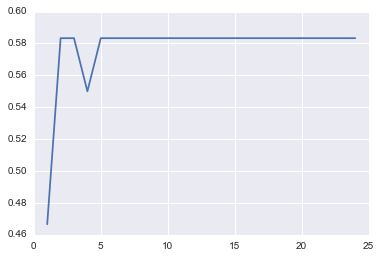

In [29]:
plt.cla()
plt.plot(range(1, 25), accuracy)

<h3>Assignment - Written Analysis</h3>

I performed random forest analysis to evaluate the importance of the incomeperperson and polityscore variables in perdicting the armedforcesrate variable. I transformed them into categorical variables so that they were compatible with the RandomForestClassifier method I was using.

The relative importance of the variables is very much skewed towards polityscore at 85% with incomeperperson at 15%, making the impact of polityscore vastly more important. The accuracy of the model is about 58%, we can see this from the accuracy score in the out[24] section above. When we look at the accuracy score as we change the number of trees we also see that the accuracy very quickly trands to 58% then remains there.

From a computing perspective we could potentially run the model with many ferwer trees, around 5 or 10. This would mean that we could save time and computing power to make the model more complex while potentially retaining accuracy. As the accuracy score does change by around 12% in the first 5 trees I think that using the Random Forest Classifier method is more appropriate in this case.